In [18]:
# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generating Synthetic data for 100 trials

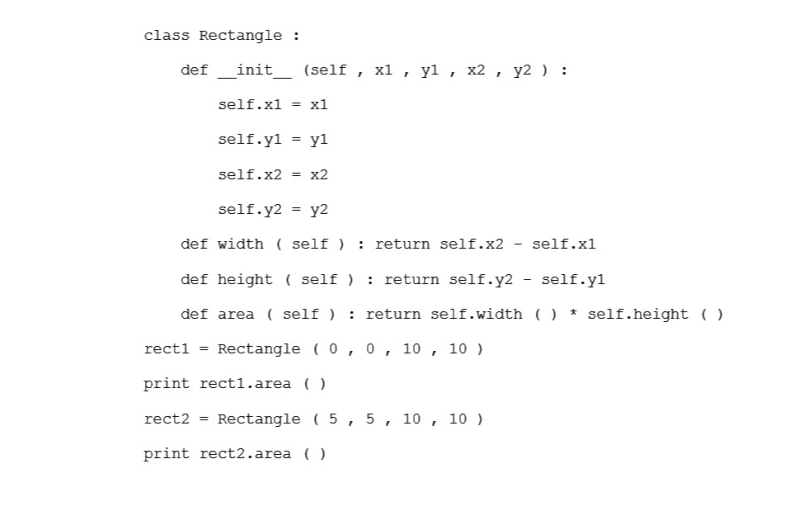

In [19]:
# just showing you the image of the text we will be using to generate fixations over

from IPython.display import Image

img = Image(filename='code_snippet.png')
img

In [20]:
# Importing all the required stuff
import emip_toolkit as EMTK
import correction
import json
import os
import numpy as np
import drift_algorithms_osf as algo
import algorithms as best_algs
from tqdm import tqdm
import statistics
# Importing the correction_mode_of_disparities function from the ModeOfDisparities folder and the __init__.py file
from Algorithms.ModeOfDisparities import correction_mode_of_disparities

In [21]:
# Helper functions
def mean_error_group(results):
    new_list = []
    
    for result in results:
        new_list.append(statistics.mean(result))
        
    return new_list

In [22]:
# generate areas of interest around each word, we will see a visualization of this in a second

image_path = "./"
image = "code_snippet.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")
aoi

,kind,name,x,y,width,height,image
0,sub-line,line 1 part 1,142.5,27,50,20,code_snippet.png
1,sub-line,line 1 part 2,197.5,27,88,20,code_snippet.png
2,sub-line,line 1 part 3,292.5,27,9,20,code_snippet.png
3,sub-line,line 2 part 1,178.5,61,33,22,code_snippet.png
4,sub-line,line 2 part 2,214.5,61,81,22,code_snippet.png
...,...,...,...,...,...,...,...
89,sub-line,line 12 part 12,475.5,410,10,21,code_snippet.png
90,sub-line,line 13 part 1,141.5,444,51,22,code_snippet.png
91,sub-line,line 13 part 2,197.5,444,97,22,code_snippet.png
92,sub-line,line 13 part 3,302.5,444,9,22,code_snippet.png


In [23]:
# we add the actual word associated with each area of interest (AOI)

file_path = "./"

aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()

,kind,name,x,y,width,height,image,token
0,sub-line,line 1 part 1,142.5,27,50,20,code_snippet.png,class
1,sub-line,line 1 part 2,197.5,27,88,20,code_snippet.png,Rectangle
2,sub-line,line 1 part 3,292.5,27,9,20,code_snippet.png,:
3,sub-line,line 2 part 1,178.5,61,33,22,code_snippet.png,def
4,sub-line,line 2 part 2,214.5,61,81,22,code_snippet.png,__init__


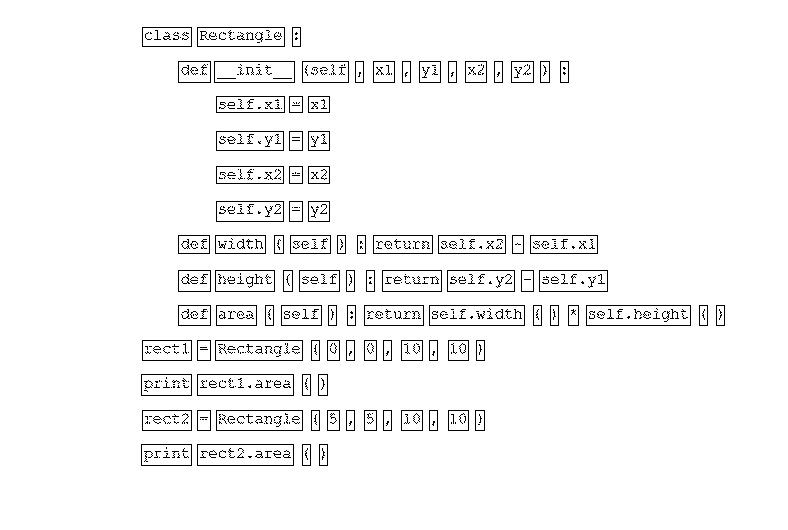

In [24]:
# finally, a visualization of the areas of interest (AOIs) around words!

EMTK.draw_aoi(aoi, image, image_path)

[[480.5, 342.5, 50], [163.16666666666666, 47.0, 250], [157.16666666666666, 39.0, 250], [301.1666666666667, 132.0, 50], [322.8333333333333, 100.5, 100], [238.5, 423.5, 450], [222.83333333333334, 46.0, 450], [231.5, 245.5, 250], [285.1666666666667, 318.5, 200], [491.5, 71.0, 100], [359.5, 425.5, 50], [297.1666666666667, 322.5, 200], [350.5, 426.5, 50], [507.5, 243.5, 50], [366.8333333333333, 356.5, 50], [406.5, 279.0, 300], [227.5, 288.0, 300], [179.16666666666666, 253.5, 150], [505.5, 69.0, 100], [241.5, 412.5, 450], [155.5, 382.0, 250], [396.5, 69.0, 100], [458.5, 312.5, 500], [155.16666666666666, 42.0, 250], [239.5, 75.0, 400], [150.16666666666666, 356.5, 250], [310.1666666666667, 271.0, 200], [160.5, 463.0, 250], [240.16666666666666, 217.5, 350], [307.8333333333333, 212.5, 100], [376.8333333333333, 75.0, 50], [226.83333333333334, 43.0, 450], [292.1666666666667, 149.0, 50], [534.8333333333334, 289.0, 50], [247.83333333333334, 341.5, 450], [221.83333333333334, 385.0, 500], [557.5, 275.

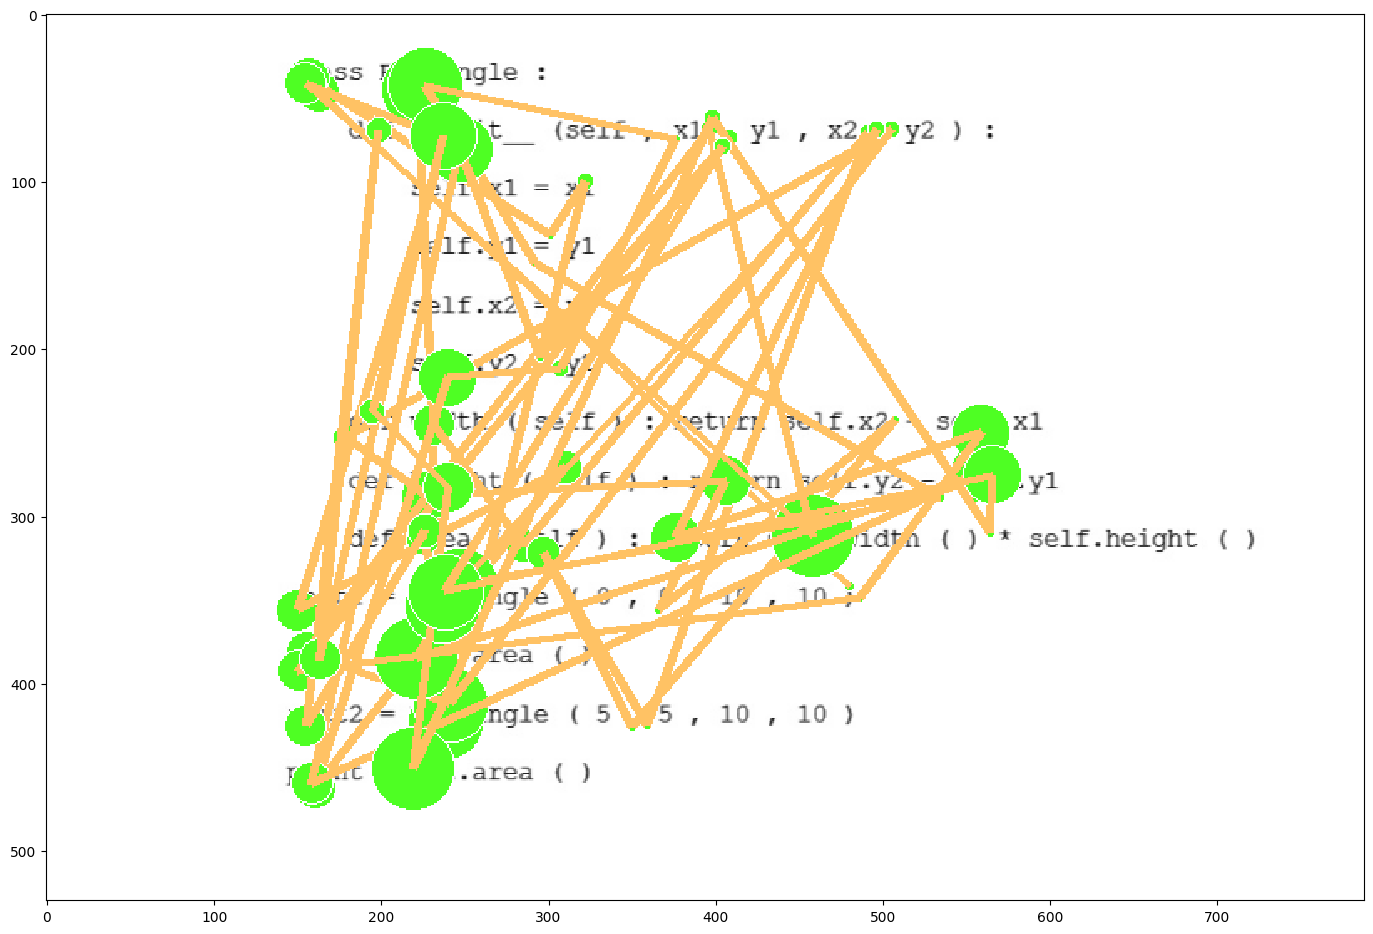

In [25]:
# generating a synthetic trial
synth_fixations = correction.generate_fixations_code(aois_with_tokens)
print(synth_fixations)

# drawing the synthetic data!
correction.draw_fixation('code_snippet.png', synth_fixations)

# Generating a synthetic dataset with 100 readers:

In [26]:
data = {}

# loop 100 times maintaining a variable called index
for index in range(100):

    # generate a synthetic trial using similar code to the one above
    
    synth_fixations = correction.generate_fixations_code(aois_with_tokens)
    # store the trial in the dictionary called "data" where the key is "robot" + str(index)
    data["robot" + str(index)] = synth_fixations
    

In [27]:
# check that the data looks correct

data["robot1"]

[[389.5, 234.5, 300],
 [461.5, 66.0, 100],
 [307.8333333333333, 113.5, 100],
 [151.16666666666666, 356.5, 250],
 [245.5, 64.0, 400],
 [163.16666666666666, 32.0, 250],
 [306.1666666666667, 245.5, 200],
 [158.16666666666666, 418.5, 250],
 [361.5, 78.0, 200],
 [245.5, 74.0, 400],
 [248.5, 425.5, 450],
 [244.5, 280.0, 300],
 [247.5, 77.0, 400],
 [253.5, 420.5, 450],
 [231.5, 282.0, 300],
 [571.5, 282.0, 350],
 [529.1666666666666, 62.0, 50],
 [250.5, 70.0, 400],
 [250.5, 429.5, 450],
 [310.8333333333333, 105.5, 100],
 [240.5, 285.0, 300],
 [553.5, 284.0, 350],
 [303.1666666666667, 317.5, 200],
 [306.1666666666667, 291.0, 200],
 [201.16666666666666, 420.5, 50],
 [469.1666666666667, 238.5, 350],
 [391.5, 324.5, 300],
 [517.8333333333334, 280.0, 50],
 [233.16666666666666, 135.0, 350],
 [403.5, 63.0, 100],
 [391.5, 248.5, 300],
 [241.5, 241.5, 250],
 [402.5, 239.5, 300],
 [553.5, 274.0, 350],
 [196.16666666666666, 250.5, 150],
 [216.83333333333334, 41.0, 450],
 [465.1666666666667, 244.5, 350],


In [28]:
# convert data into json format, then store it in a text file called "synthetic_dataset_with_time.txt"

# Check if the file already exists
# If it does, skip this step
if not os.path.exists("synthetic_dataset_with_time.txt"):
    # Open a file for writing
    synthetic_dataset_with_time = open("synthetic_dataset_with_time.txt", "w")

    # Save the dictionary into this file
    # (the 'indent=4' is optional, but makes the json file more readable)
    json.dump(data, synthetic_dataset_with_time, indent=4)

    # Close the file
    synthetic_dataset_with_time.close()

    # check that the file looks correct
    synthetic_dataset_with_time = open("synthetic_dataset_with_time.txt", "r")

    print(synthetic_dataset_with_time.read())



# GENERATING ERRORS

In [29]:
# open the generated synthetic data file and read it as a python dictionary called data

import json

file = open('synthetic_dataset_with_time.txt', 'r')
text = file.read()
data = json.loads(text)

In [30]:
import emip_toolkit as EMTK

# find areas of interest (AOIs) once again
image_path = "./"
image = "code_snippet.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")


# add tokens to AOIs 
file_path = "./"
aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()


import correction

# find the y coordinate of each line in the text
line_ys = correction.find_lines_Y(aoi)

In [31]:
synth = correction.generate_fixations_code(aois_with_tokens)

# Universal Function for comparing algorithm statistics for different kinds of errors

In [35]:
# Creating a function out of all the code below
def synthetic_error_analysis(error_type, iterations):

    # create empty lists to store results
    attach_results = [[],[],[],[],[],[],[],[],[],[],[]]
    regress_results = [[],[],[],[],[],[],[],[],[],[],[]]
    warp_results = [[],[],[],[],[],[],[],[],[],[],[]]
    cluster_results = [[],[],[],[],[],[],[],[],[],[],[]]
    compare_results = [[],[],[],[],[],[],[],[],[],[],[]]
    merge_results = [[],[],[],[],[],[],[],[],[],[],[]]
    segment_results = [[],[],[],[],[],[],[],[],[],[],[]]
    split_results = [[],[],[],[],[],[],[],[],[],[],[]]
    stretch_results = [[],[],[],[],[],[],[],[],[],[],[]]
    compare_fix_num_results = [[],[],[],[],[],[],[],[],[],[],[]]
    compare_line_length_results = [[],[],[],[],[],[],[],[],[],[],[]]
    fix_align_results = [[],[],[],[],[],[],[],[],[],[],[]]
    mode_of_disparities_results = [[],[],[],[],[],[],[],[],[],[],[]]
    #hill_climb_results = [[],[],[],[],[],[],[],[],[],[],[]]

    file = open('synthetic_dataset_with_time.txt', 'r')
    text = file.read()
    data = json.loads(text)

    word_centers = correction.find_word_centers(aoi)
    word_centers = np.array(word_centers.copy(), dtype=int)

    duration_word_centers = correction.find_word_centers_and_duration(aois_with_tokens)
    duration_word_centers = np.array(duration_word_centers.copy(), dtype=int)

    image_path = "./"
    image = "code_snippet.png"
    aoi_words = EMTK.find_aoi(image, image_path, level="sub-line")
    aoi_lines = EMTK.find_aoi(image, image_path, level="line")

    # Creating a sample lsit to store an array of an array of words where each index represents a line
    words_sorted_by_line = []

    for i in range(len(aoi_lines)):
        words_sorted_by_line.append([])

    # Looping through the words and appending them to the correct line
    for i in range(len(aoi_words)):
        word_line_number = int(aoi_words.at[i, 'name'].strip().split(' ')[1])
        # Appending the x and y coordinates of the word to the correct line
        words_sorted_by_line[word_line_number-1].append([aoi_words.at[i, 'x'], aoi_words.at[i, 'y']])


    # MAKE SURE YOU RUN THIS 100 TIMES, NOT JUST ONE!!!
    for robot_index in tqdm(range(iterations)):
        
        for error_probability in range(0, 11):
            error_test = []
            # generate error based on the error type
            if error_type == "noise":
                error_test = correction.error_noise(error_probability/10, 30, error_probability/10, data['robot' + str(robot_index)].copy())
            elif error_type == "slope":
                slope = slope = -0.125 + (error_probability * 0.025)
                error_test = correction.error_slope(slope, data['robot' + str(robot_index)].copy())
            elif error_type == "shift":
                shift = -0.25 + error_probability * 0.05
                error_test = correction.error_shift(shift, data['robot' + str(robot_index)].copy(), aoi_lines)
            elif error_type == "within_line_regression":
                error_test, data['robot' + str(robot_index)] = correction.error_within_line_regression(error_probability/10, data['robot' + str(robot_index)].copy(), words_sorted_by_line, aoi_lines)
            elif error_type == "between_line_regression":
                error_test = correction.error_between_line_reg(error_probability/10, data['robot' + str(robot_index)].copy())
            elif error_type == "offset":
                error_test = correction.error_offset(error_probability/10, error_probability/10, data['robot' + str(robot_index)].copy())
                
            
            # hill_climbing correction - 5
            np_array = np.array(error_test.copy())
            '''
            clusters = best_algs.make_cluster_refactor(np.array(synth))
            print("HIIIIII", clusters)
            corrections = best_algs.correct_cluster(clusters, aois_with_tokens)
            print("DONE", corrections)
        
            percentage, match_list = correction.correction_quality(aoi, synth_fixations, corrections)
            hill_climb_results[error_probability].append(percentage)
            '''
            
            # attach correction - 1
            np_array = np.array(error_test.copy())
            attach_correction = algo.attach(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), attach_correction)
            attach_results[error_probability].append(percentage)
            
            # regress correction - 3
            np_array = np.array(error_test.copy())
            regress_correction = algo.regress(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), regress_correction)
            regress_results[error_probability].append(percentage)
            
            # warp correction - 4
            np_array = np.array(error_test.copy(), dtype=int)
            durations = np.delete(np_array, 0, 1)
            durations = np.delete(durations, 0, 1)
            np_array = np.delete(np_array, 2, 1)
            
            warp_correction = algo.warp(np_array, word_centers)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), warp_correction)
            warp_results[error_probability].append(percentage)

            if percentage < 1:
                # correction.draw_correction('synthetic_text.png', warp_correction, match_list)
                print("robot:", robot_index, "    error probability:", error_probability)

            # cluster correction - 5
            np_array = np.array(error_test.copy())
            cluster_correction = algo.cluster(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), cluster_correction)
            cluster_results[error_probability].append(percentage)

            # compare correction - 6 
            np_array = np.array(error_test.copy())
            compare_correction = algo.compare(np_array, duration_word_centers)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), compare_correction)
            compare_results[error_probability].append(percentage)

            # merge correction - 7
            np_array = np.array(error_test.copy())
            merge_correction = algo.merge(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), merge_correction)
            merge_results[error_probability].append(percentage)

            # segment correction - 8
            np_array = np.array(error_test.copy())
            segment_correction = algo.segment(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), segment_correction)
            segment_results[error_probability].append(percentage)

            # split correction - 9
            np_array = np.array(error_test.copy())
            split_correction = algo.split(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), split_correction)
            split_results[error_probability].append(percentage)

            # stretch correction - 10
            np_array = np.array(error_test.copy())
            stretch_correction = algo.stretch(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), stretch_correction)
            stretch_results[error_probability].append(percentage)

            # compare by fixation number - 11
            np_array = np.array(error_test.copy())
            compare_fix_number_correction = algo.compare_fixnum(np_array, duration_word_centers)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), compare_fix_number_correction)
            compare_fix_num_results[error_probability].append(percentage)

            # Compare by line length - 12
            np_array = np.array(error_test.copy())
            compare_line_length_correction = algo.compare_line_len(np_array, duration_word_centers)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), compare_line_length_correction)
            compare_line_length_results[error_probability].append(percentage)

            # Fix align - 13
            np_array = np.array(error_test.copy())
            fix_align_correction = algo.fix_align(np_array, duration_word_centers)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), fix_align_correction)
            fix_align_results[error_probability].append(percentage)

            # Mode of disparities - 14
            np_array = np.array(error_test.copy())
            mode_of_disparities_correction = correction_mode_of_disparities(np_array, aoi_words)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), mode_of_disparities_correction)
            mode_of_disparities_results[error_probability].append(percentage)

            # Warp with regression - 15
            # np_array = np.array(error_test.copy())
            # warp_correction, data['robot' + str(robot_index)] = algo.warp_with_regression(error_test.copy(), word_centers, words_sorted_by_line, aoi_lines, data['robot' + str(robot_index)].copy())
            # percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), warp_correction)
            # warp_with_regression_results[error_probability].append(percentage)

    mean_attach_results = mean_error_group(attach_results)
    mean_regress_results = mean_error_group(regress_results)
    mean_warp_results = mean_error_group(warp_results)
    mean_cluster_results = mean_error_group(cluster_results)
    mean_compare_results = mean_error_group(compare_results)
    mean_merge_results = mean_error_group(merge_results)
    mean_segment_results = mean_error_group(segment_results)
    mean_split_results = mean_error_group(split_results)
    mean_stretch_results = mean_error_group(stretch_results)
    mean_compare_fix_num_results = mean_error_group(compare_fix_num_results)
    mean_compare_line_length_results = mean_error_group(compare_line_length_results)
    mean_fix_align_results = mean_error_group(fix_align_results)
    mean_mode_of_disparities_results = mean_error_group(mode_of_disparities_results)

    import matplotlib.pyplot as plt
    plt.plot(mean_attach_results, color='Black', linewidth=1, marker='^')
    plt.plot(mean_regress_results, color='Aqua', linewidth=1, marker='s')
    plt.plot(mean_warp_results, color='DarkViolet', linewidth=1, marker='d')
    plt.plot(mean_cluster_results, color='DarkOrange', linewidth=1, marker='p')
    plt.plot(mean_compare_results, color='DarkGreen', linewidth=1, marker='h')
    plt.plot(mean_merge_results, color='DarkRed', linewidth=1, marker='*')
    plt.plot(mean_segment_results, color='DarkBlue', linewidth=1, marker='x')
    plt.plot(mean_split_results, color='DarkCyan', linewidth=1, marker='1')
    plt.plot(mean_stretch_results, color='DarkMagenta', linewidth=1, marker='2')
    plt.plot(mean_compare_fix_num_results, color='DarkGoldenRod', linewidth=1, marker='3')
    plt.plot(mean_compare_line_length_results, color='DarkSlateGray', linewidth=1, marker='4')
    plt.plot(mean_fix_align_results, color='DarkSlateBlue', linewidth=1, marker='5')
    plt.plot(mean_mode_of_disparities_results, color='DarkSlateGrey', linewidth=1, marker='o')

    plt.legend(['attach', 'regress', 'warp', 'cluster', 'compare', 'merge', 'segment', 'split', 'stretch', 'compare_fix_num', 'compare_line_length', "fix_align", "mode_of_disparities"], loc='lower right')
    plt.ylabel('Accuracy of algorithmic correction (%))')
    plt.xlabel(error_type + ' distortion')

    print(error_type + " Error Statistics:")
    print("mean attach:", statistics.mean(mean_attach_results))
    print("mean regress:", statistics.mean(mean_regress_results))
    print("mean warp:", statistics.mean(mean_warp_results))
    print("mean cluster:", statistics.mean(mean_cluster_results))
    print("mean compare:", statistics.mean(mean_compare_results))
    print("mean merge:", statistics.mean(mean_merge_results))
    print("mean segment:", statistics.mean(mean_segment_results))
    print("mean split:", statistics.mean(mean_split_results))
    print("mean stretch:", statistics.mean(mean_stretch_results))
    print("mean compare fix num:", statistics.mean(mean_compare_fix_num_results))
    print("mean compare line length:", statistics.mean(mean_compare_line_length_results))
    print("mean fix align:", statistics.mean(mean_fix_align_results))
    print("mean mode of disparities:", statistics.mean(mean_mode_of_disparities_results))

    x_ticks_labels = ['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
    plt.xticks(range(0, 11), x_ticks_labels)
    #plt.savefig("noise_comparison.png")
    plt.show()

        
        # print("mean fix align:", statistics.mean(mean_fix_align_results))
        # print("mean mode of disparities:", statistics.mean(mean_mode_of_disparities_results))
        # print("mean warp regression:", statistics.mean(mean_warp_regression_results))



# NOISE ERROR

[[157.16666666666666, 387.5, 432], [160.16666666666666, 365.5, 67], [254.5, 429.5, 42], [254.83333333333334, 357.5, 0], [236.83333333333334, 351.5, 597], [223.5, 208.5, 78], [156.16666666666666, 333.5, 244], [233.5, 272.0, 43], [231.5, 247.5, 444], [491.5, 71.0, 7], [246.5, 72.0, 779], [168.5, 433.0, 395], [367.5, 64.0, 205], [409.5, 282.0, 532], [230.83333333333334, 11.0, 513], [229.16666666666666, 172.0, 201], [307.8333333333333, 84.5, 113], [167.16666666666666, 335.5, 333], [233.16666666666666, 304.5, 240], [239.5, 79.5, 555], [223.83333333333334, 53.0, 212], [232.5, 304.0, 470], [463.5, 345.5, 547], [227.83333333333334, 16.0, 757], [227.5, 298.0, 314], [230.83333333333334, 43.0, 648], [239.5, 309.0, 398], [458.5, 321.5, 615], [297.1666666666667, 151.0, 29], [223.16666666666666, 333.5, 96], [151.5, 388.0, 299], [150.5, 412.0, 380], [197.16666666666666, 346.5, 9], [155.5, 407.0, 400], [508.5, 256.5, 66], [162.16666666666666, 369.5, 268], [226.83333333333334, 444.0, 726], [545.1666666

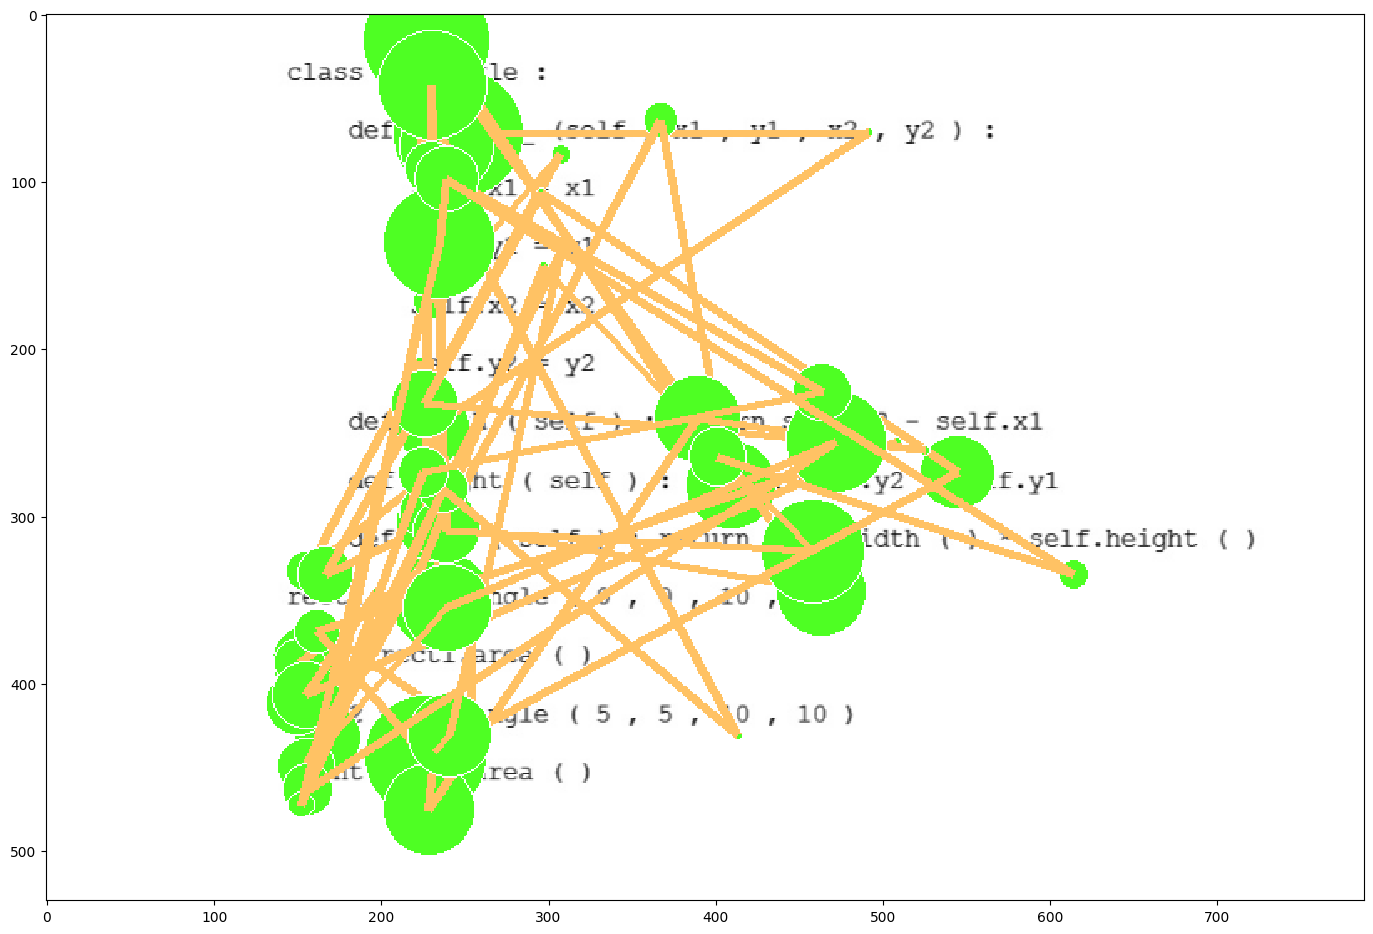

In [33]:
# Disabling the warnings
import warnings
warnings.filterwarnings('ignore')
# generate noise over the correct trial

error_test = correction.error_noise(1, 30, 1, data['robot1'].copy())
print(error_test)

# draw the trial with added error
correction.draw_fixation('code_snippet.png', error_test)

  0%|          | 0/1 [00:00<?, ?it/s]

robot: 0     error probability: 0
robot: 0     error probability: 1
robot: 0     error probability: 2
robot: 0     error probability: 3
robot: 0     error probability: 4
robot: 0     error probability: 5
robot: 0     error probability: 6
robot: 0     error probability: 7
robot: 0     error probability: 8
robot: 0     error probability: 9
robot: 0     error probability: 10


100%|██████████| 1/1 [02:22<00:00, 142.17s/it]


noise Error Statistics:
mean attach: 0.7727272727272727
mean regress: 0.7618181818181818
mean warp: 0.08181818181818182
mean cluster: 0.49636363636363634
mean compare: 0.16
mean merge: 0.4636363636363636
mean segment: 0.12
mean split: 0.3709090909090909
mean stretch: 0.6872727272727273
mean compare fix num: 0.06
mean compare line length: 0.16
mean mode of disparities: 0.4872727272727273


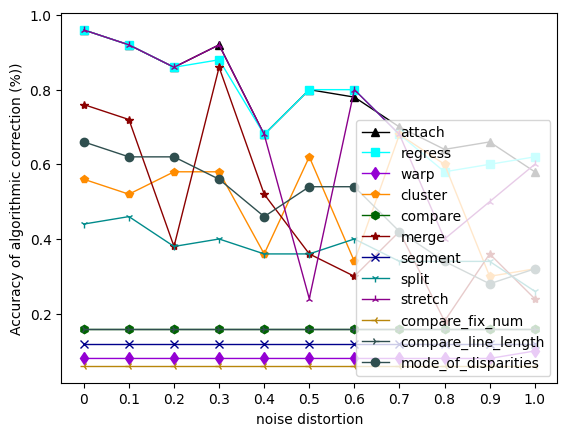

In [34]:
# Running the function
synthetic_error_analysis("noise", 1)